# Monte Carlo Pi Approximation

## Monte Carlo Method

The basic principle of the Monte Carlo Method is to implement on a computer the <b>Strong Law of Large Numbers (SLLN)</b>.

If we can generate a sequence $X_1, X_2, X_3, \ldots$ of i.i.d. random variables (i.e., independent and identically distributed) with finite mean $\mathbb{E}[X_1] = \mu$, then the SLLN guarantees that the <i>sample mean</i> (or <i>empirical mean</i>)

$$ \bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n} ç \mu \qquad \text{as } n \rightarrow \infty \text{ with probability 1}.$$

In other words, $\bar{X}_n$ is a good approximation for $\mu$ if the number of simulations $n$ is large enough:

$$ \bar{X}_n \approx \mu \qquad \text{for } n \text{ large}.$$

In addition, if we are interested in approximating the probability that some event $A$ occurs, we might adopt the SLLN as follows: We simulate repeated independent trials of a random experiment and define the sequence of random variables $X_1, X_2,\dots$ via

$$ X_i = \begin{cases} 1 & \text{if $A$ occurs on the $i$-th simulation} \\ 0 & \text{if $A$ does not occur on the $i$-th simulation} \end{cases} \qquad (i = 1,2,3,\ldots).$$

Then, $\bar{X}_n$ is the proportion of the $n$ trials in which $A$ occurs. By construction the random variables $X_1, X_2,\dots$ are independent and identically distributed with mean $\mathbb{E}[X_1] = \mathbb{P}[A]$. Thus, by the SLLN we again obtain

$$ \bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n} \longrightarrow \mathbb{P}[A] \qquad \text{as } n \rightarrow \infty \text{ with probability 1},$$

and hence 

$$ \bar{X}_n \approx \mathbb{P}[A] \qquad \text{for } n \text{ large}.$$



In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Pi Approximation

The Monte Carlo Method is also typically used to numerically compute an approximation of a quantity that is very hard or even impossible to compute, like some integrals. 

Suppose we want to write a Python code to estimate the irrational number...

$$ \pi = 3.1415926535897932384626433\ldots $$

based on the Monte Carlo Method. Specifically, let's recall that...

$$ \pi = \int_0^1 4 \sqrt{1-x^2} ds$$

and let's generate a sequence $U_1, U_2, \ldots$ of independent, uniformly distributed RVs on $[0,1]$ to perform our MC estimation.

In [14]:
def mcSim():
    simArray = []
    uArray = np.random.random_sample(10000)
    simSum = 0
    for n in range(1,10001):
        simSum += (4*math.sqrt(1-(uArray[n-1]**2)))
        simMean = simSum/n
        simArray.append(simMean)
    return simArray

We'll plot our estimates for different numbers of used simulations $n$, running from 1 to 1,000, to illustrate how our estimate appears to converge to $\pi$.

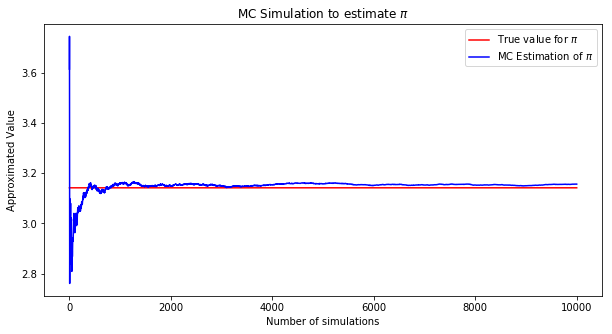

In [15]:
plt.figure(figsize=(10,5))
plt.title("MC Simulation to estimate $\pi$")
plt.plot(np.arange(10000),np.pi*np.ones(10000),'-',color="red",label="True value for $\pi$")
plt.plot(np.arange(10000),mcSim(),'-',color="blue",label="MC Estimation of $\pi$")
plt.xlabel("Number of simulations")
plt.ylabel("Approximated Value")
plt.legend(loc="upper right")

## Pi Approximation w/ Confidence Intervals

In practice, the tremendous success of the Monte Carlo method is due to the fact that we can design a <i>probabilistic control of the approximation error</i> $ \vert \bar{X}_n - \mu \vert$, which is directly derived from the <b>Central Limit Theorem (CLT)</b>.

Indeed, for any given $\varepsilon > 0$ and large $n$, we get via the CLT that
\begin{align}
\mathbb{P}\left[ \vert \bar{X}_n - \mu \vert \leq \varepsilon \right] & = \mathbb{P}\left[ -\varepsilon \leq \bar{X}_n - \mu \leq + \varepsilon \right] = \mathbb{P}\left[ -\frac{\varepsilon\sqrt{n}}{\sigma} \leq \frac{\sqrt{n} (\bar{X}_n - \mu) }{\sigma} \leq \frac{\varepsilon\sqrt{n}}{\sigma} \right] \\ & \approx \Phi\left(\frac{\varepsilon\sqrt{n}}{\sigma}\right) - \Phi\left(-\frac{\varepsilon\sqrt{n}}{\sigma}\right) = 2 \Phi\left(\frac{\varepsilon\sqrt{n}}{\sigma} \right) - 1,
\end{align}

where $\text{Var}(X_1) = \sigma^2$ denotes the variance and $\Phi$ the CDF of the standard normal distribution.

Now, if we choose $\varepsilon$ such that 

$$ 2 \Phi\left(\frac{\varepsilon\sqrt{n}}{\sigma} \right) - 1 = 1 - \alpha $$

for some $\alpha > 0$ small, which is the case if we set

$$ \varepsilon = \frac{z_{\alpha} \, \sigma}{\sqrt{n}} $$ 

where $z_{\alpha}$ satisfies $\Phi(z_{\alpha}) = 1 - \alpha/2$ ($z_\alpha$ is called $(1-\alpha/2)$-<i>quantile</i> of the standard normal distribution), then

$$ \mathbb{P}\left[ \vert \bar{X}_n - \mu \vert \leq \frac{z_{\alpha} \, \sigma}{\sqrt{n}} \right] = \mathbb{P}\left[ \bar{X}_n -\frac{z_{\alpha} \, \sigma}{\sqrt{n}} \leq  \mu \leq \bar{X}_n + \frac{z_{\alpha} \, \sigma}{\sqrt{n}} \right] \approx 1 - \alpha. $$

In other words: The interval 

$$ \left[ \bar{X}_n - \frac{z_{\alpha} \, \sigma}{\sqrt{n}},  \bar{X}_n + \frac{z_{\alpha} \, \sigma}{\sqrt{n}} \right] $$

is a so-called <b>asymptotic</b> $(1-\alpha)$-<b>confidence interval</b> for the unkown quantity $\mu$ (i.e. <i>approximately</i> with probability $(1-\alpha)$ the unkown $\mu$ lies in this interval if the number of simulations $n$ is very large).

A common choice for $\alpha$ is $\alpha = 0.05$ to get a 95% confidence interval (in this case $z_{\alpha} \approx 1.96$).

<b>But remember</b>: Sometimes, we actually do <b>not</b> know the variance $\sigma^2$ of the random variables $X_1, X_2, \ldots$ so the above CI seems useless in practice, since it depends on $\sigma$. However, we can replace $\sigma^2$ in the CLT by the <i>sample variance</i> (<i>empirical variance</i>)...

$$
\bar{S}_n^2 := \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X}_n)^2
$$

and the statement of the CLT still holds true (albeit it is a more <b>general version of the CLT</b>). Consequently, with the same reasoning as above we obtain that...

$$ \left[ \bar{X}_n - \frac{z_{\alpha} \, \bar{S}_n}{\sqrt{n}},  \bar{X}_n + \frac{z_{\alpha} \, \bar{S}_n}{\sqrt{n}} \right] $$

is an asymptotic $(1-\alpha)$-confidence interval for the unkown quantity $\mu$, without the need to know $\sigma$.

We'll now adjust our MC simulation from above to not only compute $\bar{X}_n$, but to also compute the sample variance $\bar{S}_n^2$.

In [16]:
def mcSim2(N):
    uArray = np.random.random_sample(N)
    meanArray = []
    varArray = []
    upperArray = []
    lowerArray = []
    simMean = 0
    for n in range(1,N+1):
        fx = (4*math.sqrt(1-(uArray[n-1]**2)))
        simMean = simMean + ((fx-simMean)/n)
        if n != 1:
            simVar = (((n-2)*varArray[n-2]) + (fx-simMean)*(fx-fxOld))/(n-1)
        else:
            simVar = 0
        fxOld = fx
        meanArray.append(simMean)
        varArray.append(simVar)
        upperBound = simMean + (1.96*simVar/math.sqrt(n))
        lowerBound = simMean - (1.96*simVar/math.sqrt(n))
        upperArray.append(upperBound)
        lowerArray.append(lowerBound)
    return meanArray,varArray,upperArray,lowerArray

We'll again plot our estimates $\bar{X}_n$ for different numbers of used simulations $n$ running from 1 to 10,000, together with the <b>upper</b> and <b>lower</b> bounds of our 95% confidence interval around your estimate $\bar{X}_n$.

Our plot will illustrate how our estimate appears to converge to $\pi$ and how the confidence intervals become smaller as $n$ increases.

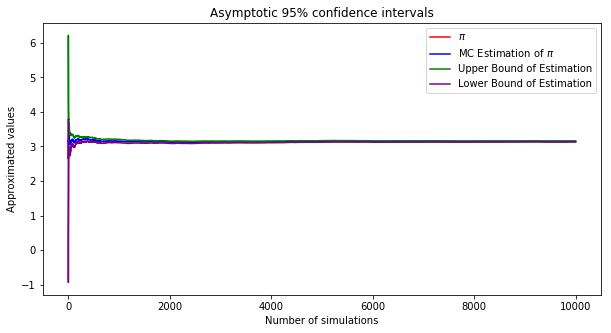

In [17]:
N = 10000

totSim = mcSim2(N)
meanArray = totSim[0]
upperArray = totSim[2]
lowerArray = totSim[3]

plt.figure(figsize=(10,5))
plt.title("Asymptotic 95% confidence intervals")
plt.plot(np.arange(N),np.pi*np.ones(N),'-',color="red",label="$\pi$")
plt.plot(np.arange(N),meanArray,'-',color="blue",label="MC Estimation of $\pi$")
plt.plot(np.arange(N),upperArray,'-',color="green",label="Upper Bound of Estimation")
plt.plot(np.arange(N),lowerArray,'-',color="purple",label="Lower Bound of Estimation")
plt.xlabel("Number of simulations")
plt.ylabel("Approximated values")
plt.legend(loc="upper right")

Note that in the above derivation of the 95% confidence level via the general version of the CLT, we used the fact that

$$ Y_n := \frac{\sqrt{n} \, (\bar{X}_n - \mu)}{\bar{S}_n}$$

is approximately standard normal distributed if $n$ is very large (note that $\bar{S}_n$ denotes the <i>sample standard deviation</i>).

We'll simulate the random variable $Y_{5000}$ (with $n=5000$) 5000 times and display the histogram of the samples $Y_{5000}$, along with the probability density function of N(0,1), to check this fact numerically.

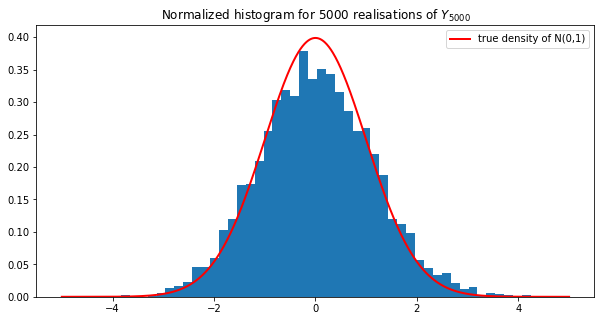

In [12]:
n = 5000
def ySimulation(n):
    simArray = []
    for i in range(n):
        totSim = mcSim2(n)
        mean = totSim[0][-1]
        var = totSim[1][-1]
        y = math.sqrt(n)*(mean - math.pi)/var
        simArray.append(y)
    return simArray

s = ySimulation(n)
I = np.linspace(-5,5,1000)

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 5000 realisations of $Y_{5000}$")
plt.hist(s, bins='auto', density='True')
plt.plot(I, 1/(np.sqrt(2 * np.pi)) * np.exp( - (I)**2 / 2 ), linewidth=2, color='r', label="true density of N(0,1)")
plt.legend()